In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [23]:
State_purchase_df = pd.read_excel('State Census Purchase Combined.xlsx')
State_crime_rate = pd.read_excel('US States Crime Rates.xls')

In [34]:
for x in State_crime_rate.columns:
    print(x.replace('\n', '').strip())

Area
Year
Population
Total Violent Crime
Violent Crime Rate per 100,000
Total Murder and nonnegligent manslaughter
Murder and nonnegligent manslaughter Rate per 100,000
Total Rape (revised definition)
Rape Rate per 100,000
Total Rape (legacy definition)
Rape Rate per 100,000.1
Total Robbery
Robbery Rate per 100,000
Total Aggravated Assault
Aggravated Assault Rate per 100,000
Total Property Crime
Property Crime Rate per 100,000
Total Burglary
Burglary Rate per 100,000
Total Larceny-theft
Larceny-theft Rate per 100,000
Total Motor Vehicle theft
Motor Vehicle Theft Rate per 100,000


In [25]:
State_purchase_df.head()

,State,Population,Population Density,HS Completion Rate (%),Higher Education (Bachlors or Higher) (%),Median Household Income ($),Per Capita Income ($),Poverty Rate (%),Black (%),America Indian (%),Asian (%),Native Hawaiian (%),Two or More Races(%),Hispanic (%),White (%),Weapons Purchase Amount,Tactical Equipment Purchase Amount,Vehicle Purchase Amount,Political Affiliation,# of Violent Crimes (2016)
0,Alabama,4874747,94.4,84.8,24.0,44758,24736,17.1,26.8,0.7,1.4,0.1,1.6,4.2,65.8,863051.39,4662372.17,5.790489e+07,Republican,532.2
1,Alaska,739795,1.2,92.3,28.8,74444,34191,9.9,3.8,15.2,6.3,1.3,7.3,7.0,61.2,36724.00,199949.38,2.200000e+04,Democrat,804.2
2,Arizona,7016270,56.3,86.2,28.0,51340,26686,16.4,4.9,5.4,3.4,0.3,2.8,30.9,55.5,296043.53,4717293.60,9.611555e+07,Democrat,470.1
3,Arkansas,3004279,56.0,85.2,21.5,42336,23401,17.2,15.7,1.0,1.6,0.3,2.0,7.3,72.9,426267.10,1303714.63,2.841457e+07,Republican,550.9
4,California,39536653,239.1,82.1,32.0,63783,31458,14.3,6.5,1.7,14.8,0.5,3.8,38.9,37.7,2940742.92,10648080.72,1.012467e+08,Democrat,445.3


In [32]:
state_stats = []

for state in State_purchase_df['State']:
    
    state_row = State_crime_rate.loc[State_crime_rate['Area'] == state]
    state_vio_cri_rate = float(state_row['Violent Crime Rate per \n100,000'])
    state_murder_manslau_rate = float(state_row['Murder and \nnonnegligent \nmanslaughter Rate per \n100,000'])
    state_rape_rate_revised = float(state_row['Rape Rate per \n100,000'])
    state_rape_rate_legacy = float(state_row['Rape Rate per \n100,000.1'])
    state_robbery_rate = float(state_row['Robbery Rate per \n100,000'])
    state_agg_assault = float(state_row['Aggravated Assault Rate per \n100,000'])
    state_pro_crime = float(state_row[' Property Crime Rate per \n100,000'])
    state_burg_rate = float(state_row[' Burglary Rate per \n100,000'])
    state_larceny_Rate = float(state_row['Larceny-theft Rate per \n100,000'])
    state_gta_rate = float(state_row['Motor Vehicle Theft Rate per \n100,000'])
    
    state_stats.append([state_vio_cri_rate, state_murder_manslau_rate, state_rape_rate_revised, state_rape_rate_legacy, state_robbery_rate, state_agg_assault, state_pro_crime, state_burg_rate, state_larceny_Rate, state_gta_rate])

In [35]:
state_crime_df = pd.DataFrame(state_stats, columns = ['Violent Crime Rate per 100,000', 'Murder and nonnegligent manslaughter Rate per 100,000', 'Revised Rape Rate per 100,000', 'Legacy Rape Rate per 100,000', 'Robbery Rate per 100,000', 'Aggravated Assault Rate per 100,000', 'Property Crime Rate per 100,000', 'Burglary Rate per 100,000', 'Larceny-theft Rate per 100,000', 'Motor Vehicle Theft Rate per 100,000' ])

In [38]:
state_purchase_census_crime_df = State_purchase_df.join(state_crime_df)

In [41]:
writer = pd.ExcelWriter('State Purchase_Census_Crime Purchase Combined.xlsx')
state_purchase_census_crime_df.to_excel(writer,'sheet 1', index = False)
writer.save()

In [43]:
political_aff = ['r' if val == 'Republican' else 'b' for val in state_purchase_census_crime_df['Political Affiliation']]

In [46]:
columns = ['Violent Crime Rate per 100,000', 'Murder and nonnegligent manslaughter Rate per 100,000', 'Revised Rape Rate per 100,000', 'Legacy Rape Rate per 100,000', 'Robbery Rate per 100,000', 'Aggravated Assault Rate per 100,000', 'Property Crime Rate per 100,000', 'Burglary Rate per 100,000', 'Larceny-theft Rate per 100,000', 'Motor Vehicle Theft Rate per 100,000' ]

In [47]:
for x in columns:
    print(x)

Violent Crime Rate per 100,000
Murder and nonnegligent manslaughter Rate per 100,000
Revised Rape Rate per 100,000
Legacy Rape Rate per 100,000
Robbery Rate per 100,000
Aggravated Assault Rate per 100,000
Property Crime Rate per 100,000
Burglary Rate per 100,000
Larceny-theft Rate per 100,000
Motor Vehicle Theft Rate per 100,000


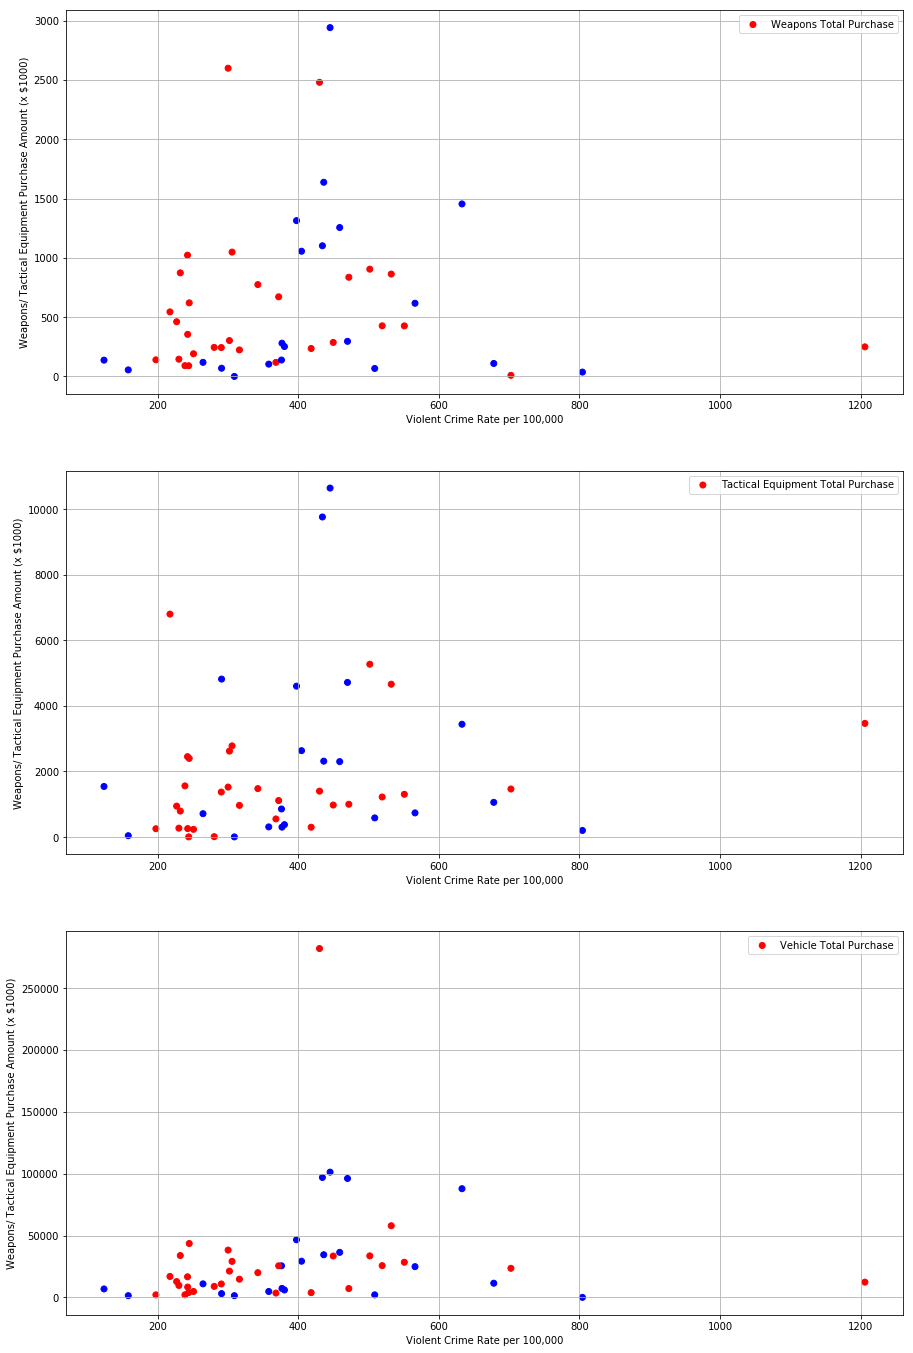

In [45]:
fig, ax = plt.subplots(3, 1, figsize=(15,24))
x_data = state_purchase_census_crime_df['Violent Crime Rate per 100,000']
y_weapons_data = np.array(state_purchase_census_crime_df['Weapons Purchase Amount'])/1000
y_accessory_data = np.array(state_purchase_census_crime_df['Tactical Equipment Purchase Amount'])/1000
y_vehicle_data = np.array(state_purchase_census_crime_df['Vehicle Purchase Amount'])/1000


ax[0].scatter(x_data, y_weapons_data, c = political_aff, label = 'Weapons Total Purchase')
#ax[0].set_xscale('log')
ax[0].set_xlabel('Violent Crime Rate per 100,000')
ax[0].set_ylabel('Weapons/ Tactical Equipment Purchase Amount (x $1000)')
ax[0].grid()
ax[0].legend()

ax[1].scatter(x_data, y_accessory_data, c = political_aff, label = 'Tactical Equipment Total Purchase')
#ax[1].set_xscale('log')
ax[1].set_xlabel('Violent Crime Rate per 100,000')
ax[1].set_ylabel('Weapons/ Tactical Equipment Purchase Amount (x $1000)')
ax[1].grid()
ax[1].legend()

ax[2].scatter(x_data, y_vehicle_data, c = political_aff, label = 'Vehicle Total Purchase')
#ax[2].set_xscale('log')
ax[2].set_xlabel('Violent Crime Rate per 100,000')
ax[2].set_ylabel('Weapons/ Tactical Equipment Purchase Amount (x $1000)')
ax[2].grid()
ax[2].legend()

plt.show()

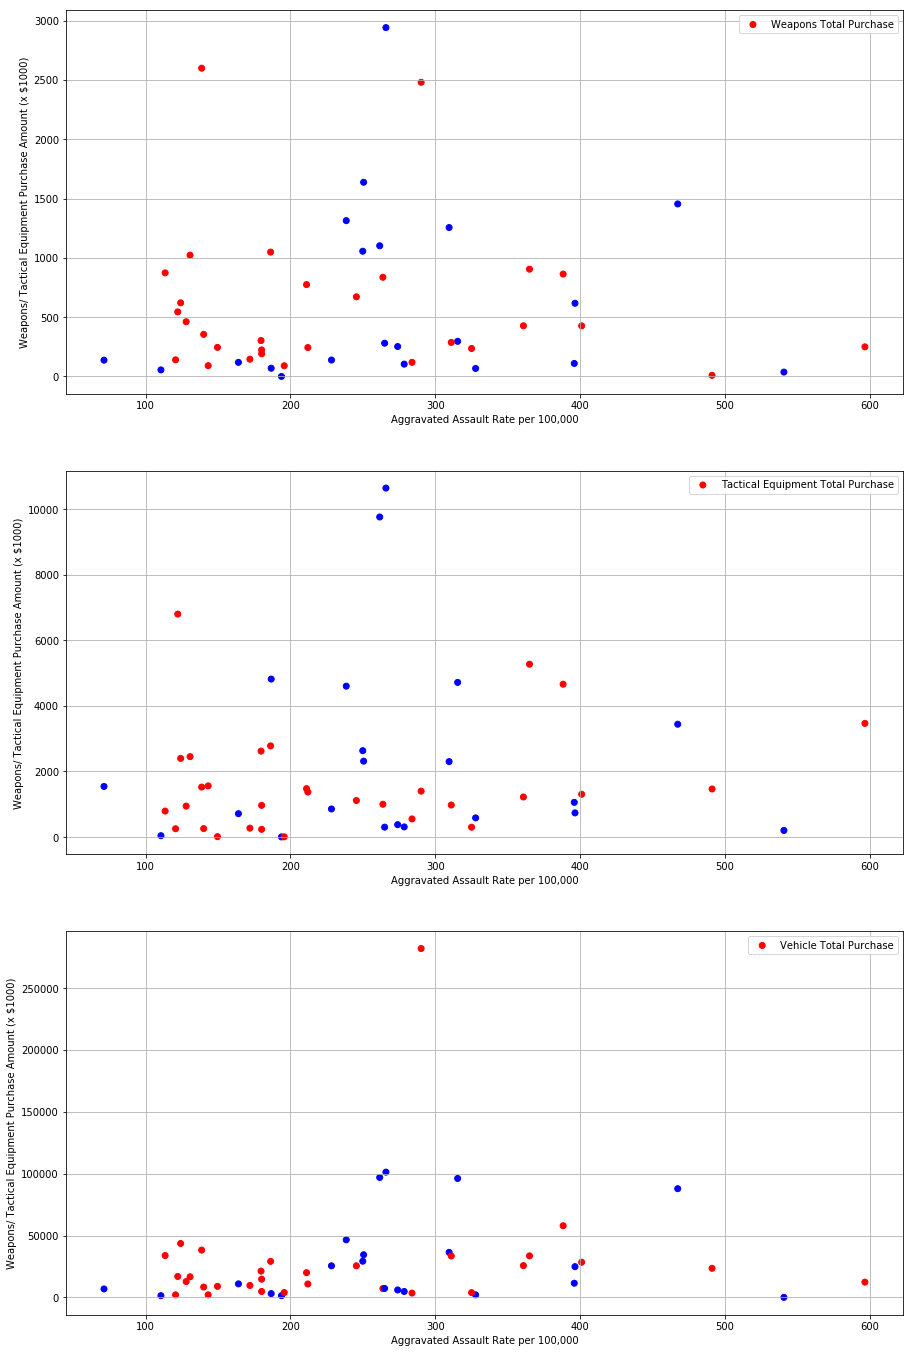

In [52]:
fig, ax = plt.subplots(3, 1, figsize=(15,24))
x_labels = 'Aggravated Assault Rate per 100,000'
x_data = state_purchase_census_crime_df[x_labels]
y_weapons_data = np.array(state_purchase_census_crime_df['Weapons Purchase Amount'])/1000
y_accessory_data = np.array(state_purchase_census_crime_df['Tactical Equipment Purchase Amount'])/1000
y_vehicle_data = np.array(state_purchase_census_crime_df['Vehicle Purchase Amount'])/1000


ax[0].scatter(x_data, y_weapons_data, c = political_aff, label = 'Weapons Total Purchase')
#ax[0].set_xscale('log')
ax[0].set_xlabel(x_labels)
ax[0].set_ylabel('Weapons/ Tactical Equipment Purchase Amount (x $1000)')
ax[0].grid()
ax[0].legend()

ax[1].scatter(x_data, y_accessory_data, c = political_aff, label = 'Tactical Equipment Total Purchase')
#ax[1].set_xscale('log')
ax[1].set_xlabel(x_labels)
ax[1].set_ylabel('Weapons/ Tactical Equipment Purchase Amount (x $1000)')
ax[1].grid()
ax[1].legend()

ax[2].scatter(x_data, y_vehicle_data, c = political_aff, label = 'Vehicle Total Purchase')
#ax[2].set_xscale('log')
ax[2].set_xlabel(x_labels)
ax[2].set_ylabel('Weapons/ Tactical Equipment Purchase Amount (x $1000)')
ax[2].grid()
ax[2].legend()

plt.show()

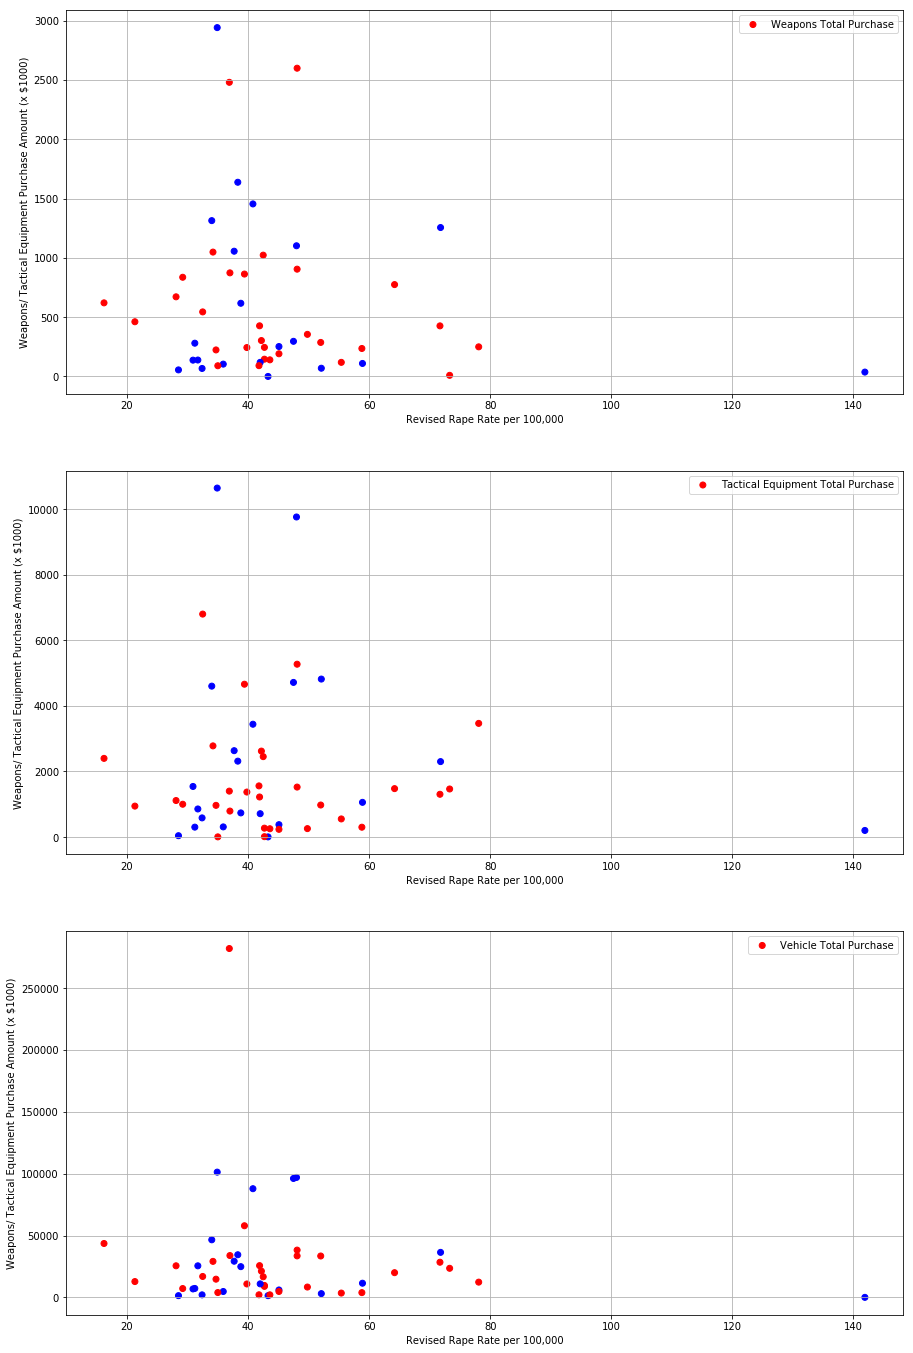

In [50]:
fig, ax = plt.subplots(3, 1, figsize=(15,24))
x_labels = 'Revised Rape Rate per 100,000'
x_data = state_purchase_census_crime_df[x_labels]
y_weapons_data = np.array(state_purchase_census_crime_df['Weapons Purchase Amount'])/1000
y_accessory_data = np.array(state_purchase_census_crime_df['Tactical Equipment Purchase Amount'])/1000
y_vehicle_data = np.array(state_purchase_census_crime_df['Vehicle Purchase Amount'])/1000


ax[0].scatter(x_data, y_weapons_data, c = political_aff, label = 'Weapons Total Purchase')
#ax[0].set_xscale('log')
ax[0].set_xlabel(x_labels)
ax[0].set_ylabel('Weapons/ Tactical Equipment Purchase Amount (x $1000)')
ax[0].grid()
ax[0].legend()

ax[1].scatter(x_data, y_accessory_data, c = political_aff, label = 'Tactical Equipment Total Purchase')
#ax[1].set_xscale('log')
ax[1].set_xlabel(x_labels)
ax[1].set_ylabel('Weapons/ Tactical Equipment Purchase Amount (x $1000)')
ax[1].grid()
ax[1].legend()

ax[2].scatter(x_data, y_vehicle_data, c = political_aff, label = 'Vehicle Total Purchase')
#ax[2].set_xscale('log')
ax[2].set_xlabel(x_labels)
ax[2].set_ylabel('Weapons/ Tactical Equipment Purchase Amount (x $1000)')
ax[2].grid()
ax[2].legend()

plt.show()

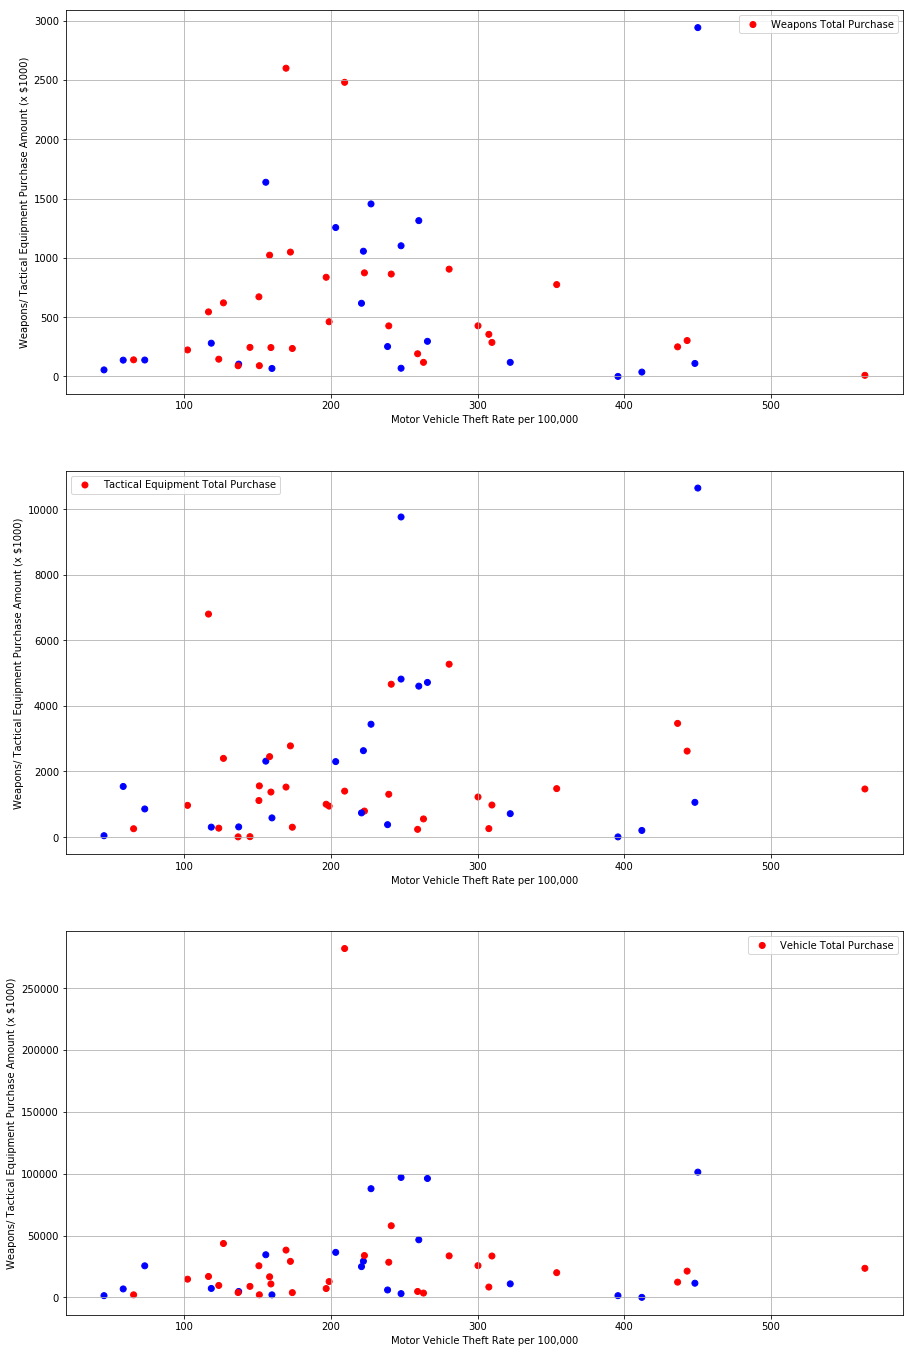

In [53]:
fig, ax = plt.subplots(3, 1, figsize=(15,24))
x_labels = 'Motor Vehicle Theft Rate per 100,000'
x_data = state_purchase_census_crime_df[x_labels]
y_weapons_data = np.array(state_purchase_census_crime_df['Weapons Purchase Amount'])/1000
y_accessory_data = np.array(state_purchase_census_crime_df['Tactical Equipment Purchase Amount'])/1000
y_vehicle_data = np.array(state_purchase_census_crime_df['Vehicle Purchase Amount'])/1000


ax[0].scatter(x_data, y_weapons_data, c = political_aff, label = 'Weapons Total Purchase')
#ax[0].set_xscale('log')
ax[0].set_xlabel(x_labels)
ax[0].set_ylabel('Weapons/ Tactical Equipment Purchase Amount (x $1000)')
ax[0].grid()
ax[0].legend()

ax[1].scatter(x_data, y_accessory_data, c = political_aff, label = 'Tactical Equipment Total Purchase')
#ax[1].set_xscale('log')
ax[1].set_xlabel(x_labels)
ax[1].set_ylabel('Weapons/ Tactical Equipment Purchase Amount (x $1000)')
ax[1].grid()
ax[1].legend()

ax[2].scatter(x_data, y_vehicle_data, c = political_aff, label = 'Vehicle Total Purchase')
#ax[2].set_xscale('log')
ax[2].set_xlabel(x_labels)
ax[2].set_ylabel('Weapons/ Tactical Equipment Purchase Amount (x $1000)')
ax[2].grid()
ax[2].legend()

plt.show()